In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 01 - Problem (case study)

Develop a model that will help the client maximize the net revenue (a regression or estimation task) generated from future renewal mailings to Lapsed donors.

Lapsed donors are individuals who made their last donation 13 to 24 months ago. They represent an important group to the organization, since the longer someone goes without donating, the less likely they will be to give again. Therefore, the recapture of these former donors is a critical aspect of their fund raising efforts.

# 02 - Getting Data

In [2]:
customer = pd.read_csv('marketing_customer_analysis.csv')
customer

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# 03 - Cleaning/Wrangling/EDA

#### Change headers names.

In [3]:
customer = customer.rename(columns={'Customer':'ID'})

#### Deal with NaN values.

In [4]:
customer.isna().sum()

ID                               0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#### Categorical Features.

In [5]:
cus_cat = customer.select_dtypes(include = np.object)
cus_cat.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_22948\3490199095.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cus_cat = customer.select_dtypes(include = np.object)


,ID,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### Numerical Features.

In [6]:
cus_num = customer.select_dtypes(include = np.number)
cus_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


#### Exploration.

In [7]:
cus_cat.count()

ID                   9134
State                9134
Response             9134
Coverage             9134
Education            9134
Effective To Date    9134
EmploymentStatus     9134
Gender               9134
Location Code        9134
Marital Status       9134
Policy Type          9134
Policy               9134
Renew Offer Type     9134
Sales Channel        9134
Vehicle Class        9134
Vehicle Size         9134
dtype: int64

In [8]:
cus_num.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# 04 - Processing Data

#### Dealing with outliers.

In [9]:
customer_out = customer[customer['Total Claim Amount']<2300].copy()

#### Normalization.

In [10]:
y = customer_out['Total Claim Amount']
X = customer_out.drop(['Total Claim Amount'], axis=1)

# Normalised

cus_num = X.select_dtypes(include = np.number)

cus_tra = MinMaxScaler().fit(cus_num)
cus_nor = cus_tra.transform(cus_num)

cus_nor = pd.DataFrame(cus_nor, columns = cus_num.columns)

#### Encoding Categorical Data.

In [11]:
cus_cat = customer_out.select_dtypes(include = np.object)

cus_one = cus_cat.drop(['ID', 'Effective To Date'], axis=1)

cus_encoder = OneHotEncoder(drop='first').fit(cus_one)
cus_encoded = cus_encoder.transform(cus_one).toarray()

cus_encoded = pd.DataFrame(cus_encoded, columns=cus_encoder.get_feature_names_out())

cus_encoded.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_22948\1704040261.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cus_cat = customer_out.select_dtypes(include = np.object)


,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Splitting into train set and test set.

In [12]:
customer2 = pd.concat([cus_nor, cus_encoded], axis=1)

y = customer_out['Total Claim Amount']
X = customer2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# 05 - Modeling

#### Apply model

In [13]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7789255744945435

# 06 - Model Validation

#### R2

In [14]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7707263423169692

#### MAE

In [15]:
mae = mean_absolute_error(y_test,predictions_test)
mae

91.68678962263296

#### MSE

In [16]:
mse=mean_squared_error(y_test,predictions_test)
mse

18218.58145195719

#### RMSE

In [17]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

134.9762255064098

# 07 - Reporting

#### Present results

Here we can see how the frecuency of each numerical variable.

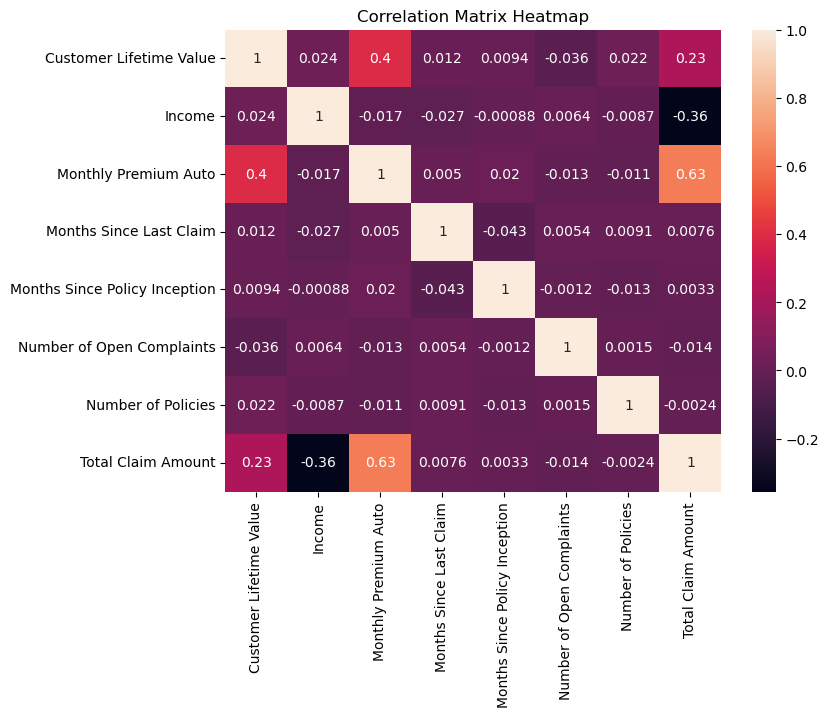

In [24]:
cus_num = customer.select_dtypes(include = np.number)

correlation_matrix = cus_num.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Here we can see that one of the variables most affect the Total Claim Amount.

We´ve also created a model that can predict the values of the Total Claim Amount based on the rest of data.